# 03 Hierarchical Clustering (Agglomorative Clustering) and Dendrogram

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
data = iris.data

### Implement HierarchicalClustering Class

In [20]:
class HierarchicalClustering:
    '''
    Takes a dataset as input and uses the Agglomerative Clustering algorithm 
    based on Euclidean cluster centroid distance to cluster the data and 
    returns the linkage matrix.

    Note: resulting linkage matrix can slighlty vary from the linkage
    matrix of the respective scipy.linkage function if data includes
    points with identical coordinates (distance = 0) since sequence in 
    which these points are clustered can differ. This deviation could
    always occur if several clusters have the identical smallest distance
    since for every step, only one cluster gets merged.
    '''
    def __init__(self):
        pass
    
    def special_distance_matrix(self, data, clustered_points):
        '''
        Fucntion to compute distance matrix for an array.
        Assigns irrelevant pairs (diagonal or already clustered) an 
        infinitive distance such that the minimal distance in the distance 
        matrix can be used to identify the relevant pair with the smallest 
        distance -> next cluster. 
        '''

        z = data.copy()
        # compute distance matrix for each point in data with complex array (newaxis)
        # This way, mutual distances can be computed vextorized
        distance_matrix = np.linalg.norm(z[:, np.newaxis, :] - z[np.newaxis, :, :], axis = -1)

        # Assign inf to diagonal to ignore points distance to themselves
        np.fill_diagonal(distance_matrix, float('inf'))

        # assign inf to distances which were already clustered before
        distance_matrix[[clustered_points],:] = float('inf')
        distance_matrix[:,[clustered_points]] = float('inf')

        return distance_matrix

    def count_links(self, linkage_matrix, idx, data_len):
        '''
        Function counts the original points of clusters.
        Used to create the linkage matrix.
        '''
        n = 1
        m = 1

        # if idx[i] >= data_len, the number of points is stored in linkage_matrix
        if idx[0] >= data_len:

            # if linkage matrix is one dimensional
            if linkage_matrix.ndim == 1:

                n = linkage_matrix[3]

            else:
                # if linkage matrix is 2D
                n = linkage_matrix[idx[0]-data_len,3]

        if idx[1] >=  data_len:

            if linkage_matrix.ndim == 1:

                m = linkage_matrix[3]
            else:    
                m = linkage_matrix[idx[1]-data_len,3]

        # note: if idx < data_len, n,m=1
        return n, m
    
    def agglomerative_clustering(self, data):
        '''
        Generate Linkage Matrix
        '''

        data_len = len(data)
        # initiate empty array to store linkage matrix
        linkage_matrix = np.array([])
        # initiate empty list to store indices of clustered points
        clustered_points = []

        # Iterate over clusters
        for i in range(0, len(data)-1):

            # use own distance function to obtain distance matrix
            distance_matrix = self.special_distance_matrix(data, clustered_points)

            # indices of the two closest points (min distance in distance_matrix)
            idx = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)

            # append to a list with index of points which were already clustered
            clustered_points.append(idx[0])
            clustered_points.append(idx[1])

            # take original number of points from linkage_matrix (n+m) with count_links
            n,m = self.count_links(linkage_matrix, idx, data_len)
            if len(linkage_matrix) == 0:

                # create linkage matrix
                linkage_matrix = np.array([idx[0], idx[1], distance_matrix[idx], n+m])

            else:
                # append linkage matrix with new row
                linkage_matrix = np.vstack([linkage_matrix, np.array([idx[0], idx[1], distance_matrix[idx], n+m])])

            # compute new centroid using weighted mean
            new_centroid = 1/(n+m)*(n*data[[idx],:][0][0] + m*data[[idx],:][0][1])

            # append new centroid to data
            data = np.vstack([data, new_centroid])

        return linkage_matrix
        

### Test Hierarchical Clustering

In [21]:
# generate a subset
idx = np.random.randint(len(data), size=40)
subset = data[idx].copy()

In [22]:
hc = HierarchicalClustering()

In [24]:
# apply function
linkage_matrix = hc.agglomerative_clustering(data=subset)
linkage_matrix

array([[ 5.        , 20.        ,  0.        ,  2.        ],
       [ 7.        , 15.        ,  0.        ,  2.        ],
       [17.        , 41.        ,  0.        ,  3.        ],
       [32.        , 38.        ,  0.        ,  2.        ],
       [35.        , 37.        ,  0.        ,  2.        ],
       [14.        , 28.        ,  0.14142136,  2.        ],
       [10.        , 44.        ,  0.14142136,  3.        ],
       [ 2.        , 45.        ,  0.21213203,  3.        ],
       [11.        , 30.        ,  0.2236068 ,  2.        ],
       [24.        , 47.        ,  0.25166115,  4.        ],
       [ 8.        , 33.        ,  0.26457513,  2.        ],
       [31.        , 49.        ,  0.26575365,  5.        ],
       [ 9.        , 21.        ,  0.28284271,  2.        ],
       [48.        , 51.        ,  0.31256999,  7.        ],
       [ 0.        , 23.        ,  0.36055513,  2.        ],
       [36.        , 53.        ,  0.3912304 ,  8.        ],
       [13.        , 27.

### Dendrogram

In [25]:
from scipy.cluster.hierarchy import dendrogram

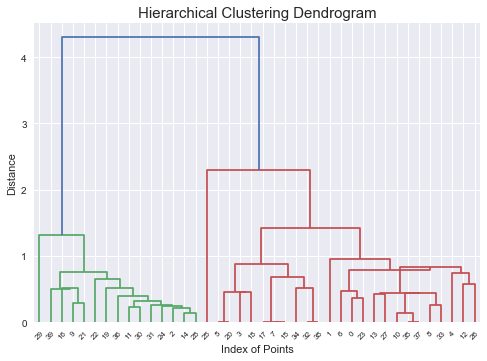

In [26]:
# plot the linkage matrix with scipy dendrogram
plt.style.use('seaborn')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram", fontsize = 15)
plt.xlabel("Index of Points")
plt.ylabel("Distance")
plt.show()